# Porosimetry

The following recipe illustrates how to simulate mercury intrusion porosimetry on an image using the ``porosimetry`` filter.  The PoreSpy implementation is equivalent to 'morphological image opening' of [Hilpert et al](https://www.sciencedirect.com/science/article/pii/S0309170800000567?via%3Dihub).  PoreSpy's implementation uses distance transforms instead of morphological operations so it is generally faster, especially for larger sphere sizes since binary opening slows down with larger structuring elements.

Start by importing the necessary packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

Generate an artificial 2D image for illustration purposes:

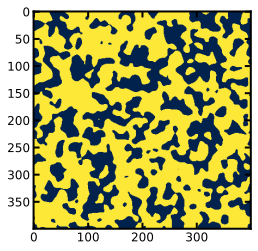

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
fig, ax = plt.subplots()
ax.imshow(im);

Apply the ``porosimetry`` filter to the image both with and without ``access_limited`` applied:

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

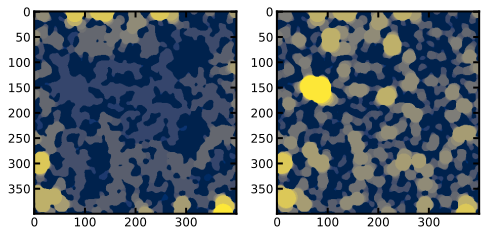

In [3]:
mip = ps.filters.porosimetry(im, access_limited=True)
local_t = ps.filters.porosimetry(im, access_limited=False)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(mip)
ax[1].imshow(local_t);

Finally, the images produced by the filter can be passed to the ``pore_size_distribution`` function in the ``metrics`` module to produce numerical data of the pore volume vs. sphere radius:

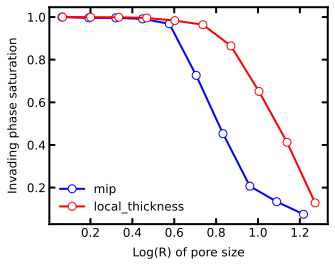

In [4]:
mip_data = ps.metrics.pore_size_distribution(mip)
local_t_data = ps.metrics.pore_size_distribution(local_t)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(mip_data.LogR, mip_data.cdf, 'bo-', label='mip')
ax.plot(local_t_data.LogR, local_t_data.cdf, 'ro-', label='local_thickness')
ax.set_ylabel('Invading phase saturation')
ax.set_xlabel('Log(R) of pore size')
ax.legend();